## Assignment 1B

### Problem 1 (100 points)

The diffraction limit of a telescope. Our ability to resolve detail in astronomical observations is limited by the diffraction of light in our telescopes. Light from stars can be treated effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we’ll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction pattern consisting of a central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by:
$$I(r)=\left(\dfrac{J_1(kr)}{kr}\right)^2$$
where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_n(x)$ are given by
$$J_n(x)=\dfrac{1}{\pi}\int_0^\pi\cos\left(n\theta-x\sin\theta\right)\ d\theta$$
where $n$ is a nonnegative integer and $x\ge0$.

#### Problem 1.A (40 points)
Write a Python function $J(n, x)$ that calculates the value of $J_n(x)$ using Simpson’s rule with $N=1000$ points. Use your function in a program to make a plot, on a single graph, of the Bessel
functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to $x=20$.

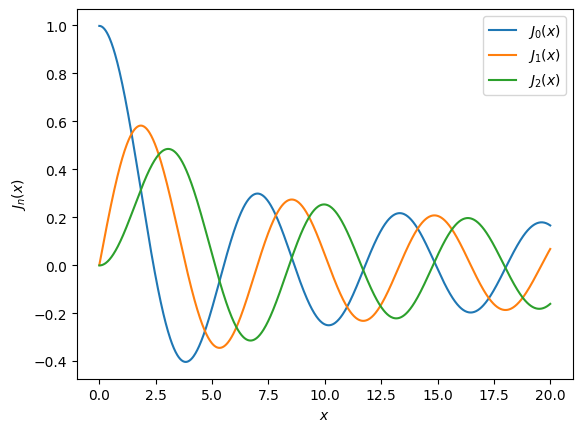

In [22]:
import numpy as np

# Simpson's Rule
def simpson(f, x: np.ndarray, dx: np.ndarray | float) -> float:
    return np.sum((f(x[0:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2])) * dx) / 3

# Bessel Function
def J(n: int, x: float) -> float:
    N: int = 1000
    theta: np.ndarray = np.linspace(0, np.pi, N)
    def f(theta: float | np.ndarray) -> float | np.ndarray:
        return np.cos(n*theta - x*np.sin(theta))
    return simpson(f, theta, np.pi/N) / np.pi

# Plot the function
import matplotlib.pyplot as plt
x: np.ndarray = np.linspace(0, 20, 1000)
y_0: np.ndarray = np.array([J(0, _) for _ in x])
y_1: np.ndarray = np.array([J(1, _) for _ in x])
y_2: np.ndarray = np.array([J(2, _) for _ in x])
plt.plot(x, y_0, label=r'$J_0(x)$')
plt.plot(x, y_1, label=r'$J_1(x)$')
plt.plot(x, y_2, label=r'$J_2(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$J_n(x)$')
plt.legend()
plt.show()

#### Problem 1.B (10 points)
For small values of $x$, the Bessel functions can be approximated as:
$$J_n(x)\sim\dfrac{1}{n!}\left(\dfrac{x}{2}\right)^n$$
For large values of x, the Bessel functions can be approximated as:
$$J_n(x)\sim\sqrt{\dfrac{2}{\pi x}}\cos\left(x-\dfrac{n\pi}{2}-\dfrac{\pi}{4}\right)$$
These asymptotic formulas provide useful approximations for $J_n(x)$ in the respective limits and can help verify numerical implementations.
Plot again the Bessel functions $J_0$, $J_1$, and $J_2$ as a function of x from $x=0$ to $x=20$, along with their asymptotic approximations provided above.

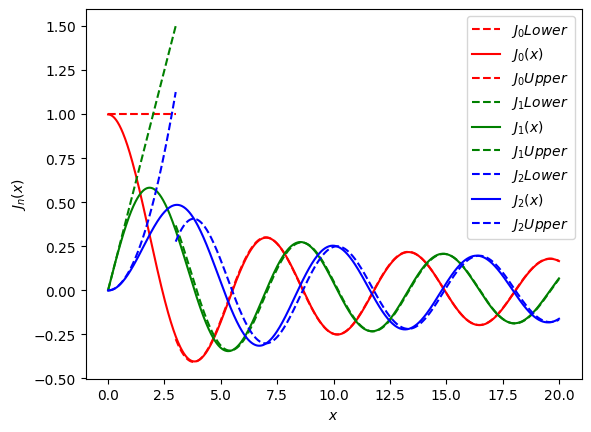

In [23]:
# Plot the function
import matplotlib.pyplot as plt
import math

# Plot all 3 functions
def plot_function(n: int, color="black") -> None:

    # Define the lower and upper functions
    def lower(n: int, x: float) -> float:
        return (x/2)**n/math.factorial(n)
    def upper(n: int, x: float) -> float:
        return np.sqrt(2/(np.pi*x)) * np.cos(x - n*np.pi/2 - np.pi/4)
    
    # Generate the domains
    x_lower:  np.ndarray = np.linspace(0, 3, 1000)
    x_bessel: np.ndarray = np.linspace(0, 20, 1000)
    x_upper:  np.ndarray = np.linspace(3, 20, 1000)

    # Generate the data
    y_lower:  np.ndarray = np.array([lower(n, _) for _ in x_lower])
    y_bessel: np.ndarray = np.array([J(n, _) for _ in x_bessel])
    y_upper:  np.ndarray = np.array([upper(n, _) for _ in x_upper])

    # Plot the functions
    plt.plot(x_lower, y_lower, label=rf'$J_{n} Lower$', linestyle='--', color=color)
    plt.plot(x_bessel, y_bessel, label=rf'$J_{n}(x)$', color=color)
    plt.plot(x_upper, y_upper, label=rf'$J_{n} Upper$', linestyle='--', color=color)

# Plot the functions
plt.figure()

plot_function(0, "red")
plot_function(1, "green")
plot_function(2, "blue")
plt.xlabel(r'$x$')
plt.ylabel(r'$J_n(x)$')
plt.legend()
plt.show()

#### Problem 1.C (50 points)
Write a second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source with $\lambda=500\text{nm}$, in a square region of the focal plane, using the formula given above. Your picture should cover values of r from zero up to about $1000\text{nm}$. Please use appropriate comments in the program.

Intensity:
$$I(r)=\left(\dfrac{J_1(kr)}{kr}\right)^2$$


where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function. The Bessel functions $J_n(x)$ are given by
$$J_n(x)=\dfrac{1}{\pi}\int_0^\pi\cos\left(n\theta-x\sin\theta\right)\ d\theta$$
where $n$ is a nonnegative integer and $x\ge0$.

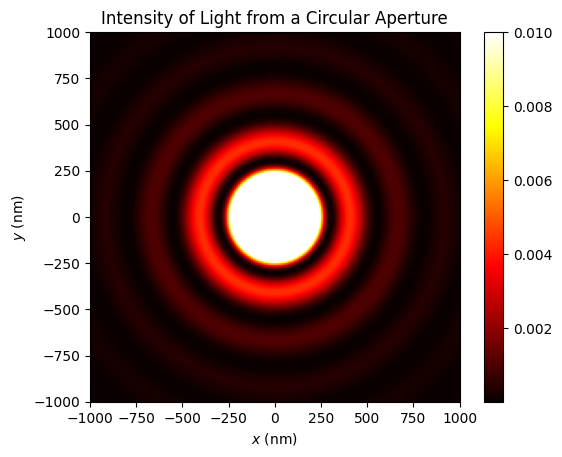

In [31]:
import numpy as np

# Problem specifications
LAMBDA = 500  # nm
def intensity(radius: float) -> float:
    K = 2*np.pi/LAMBDA
    if K*radius < 0.25:
        return 1/4
    else:
        return (J(1, K*radius)/(K*radius))**2

# Plot the intensity
x: np.ndarray = np.linspace(-1000, 1000, 200)
y: np.ndarray = np.linspace(-1000, 1000, 200)
space = np.meshgrid(x, y)
intensity_map = np.array([[intensity(np.sqrt(x**2 + y**2)) for x in x] for y in y])

# Plot the intensity
import matplotlib.pyplot as plt
plt.imshow(intensity_map, extent=(-1000, 1000, -1000, 1000), vmax=0.01, cmap='hot')
plt.colorbar()
plt.xlabel(r'$x$ (nm)')
plt.ylabel(r'$y$ (nm)')
plt.title('Intensity of Light from a Circular Aperture')
plt.show()
